In [ ]:
#importing modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objs as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cristiano_vs_messi.csv to cristiano_vs_messi.csv


In [ ]:
#reading the dataset
df = pd.read_csv('cristiano_vs_messi.csv')
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90',NaN,NaN
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13',NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1300 non-null   object
 1   comp      846 non-null    object
 2   round     846 non-null    object
 3   date      846 non-null    object
 4   venue     846 non-null    object
 5   opp       846 non-null    object
 6   pos       793 non-null    object
 7   min       1300 non-null   object
 8   type      1281 non-null   object
 9   assisted  874 non-null    object
dtypes: object(10)
memory usage: 101.7+ KB


In [ ]:
df.shape

(1300, 10)

In [ ]:
df.describe()

,player,comp,round,date,venue,opp,pos,min,type,assisted
count,1300,846,846,846,846,846,793,1300,1281,874
unique,2,15,53,745,2,182,10,107,12,132
top,ronaldo,LaLiga,Group Stage,10/7/2002,H,Sevilla FC,CF,90',Left-footed shot,Luis Suárez
freq,656,468,91,2,480,31,246,29,496,48


#Data Cleaning

In [ ]:
#determining the null values
df.isnull().sum()

player        0
comp        454
round       454
date        454
venue       454
opp         454
pos         507
min           0
type         19
assisted    426
dtype: int64

In [ ]:
#columns in the dataset
df.columns

Index(['player', 'comp', 'round', 'date', 'venue', 'opp', 'pos', 'min', 'type',
       'assisted'],
      dtype='object')

In [ ]:
df['comp']=df['comp'].ffill()
df['date']=df['date'].ffill()
df['round']=df['round'].ffill()
df['venue']=df['venue'].ffill()
df['opp']=df['opp'].ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1300 non-null   object
 1   comp      1300 non-null   object
 2   round     1300 non-null   object
 3   date      1300 non-null   object
 4   venue     1300 non-null   object
 5   opp       1300 non-null   object
 6   pos       793 non-null    object
 7   min       1300 non-null   object
 8   type      1281 non-null   object
 9   assisted  874 non-null    object
dtypes: object(10)
memory usage: 101.7+ KB


In [ ]:
df['min']=df['min'].apply(lambda x:x.replace("'",''))
df['min']=df['min'].apply(lambda x:x.replace("+",''))
df['min'].unique()

array(['34', '90', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '451', '21', '76', '63', '12', '68',
       '14', '38', '45', '59', '23', '19', '73', '82', '10', '39', '84',
       '85', '47', '50', '77', '49', '28', '5', '62', '51', '41', '35',
       '903', '22', '81', '48', '70', '902', '69', '56', '79', '16', '53',
       '3', '24', '32', '26', '25', '30', '43', '65', '11', '6', '57',
       '61', '17', '27', '1', '75', '2', '64', '71', '18', '78', '29',
       '36', '15', '55', '86', '901', '72', '20', '42', '103', '46', '52',
       '904', '37', '66', '906', '31', '40', '120', '83', '7', '33', '97',
       '104', '105', '109', '907', '457', '110', '452', '454'],
      dtype=object)

In [ ]:
df['min']=pd.to_numeric(df['min'])
df['time_class']=df['min'].apply(lambda x:'first_half' if x<=45 else ( 'secound_half' if 45<x<=90 else 'extra_time'))
df.head(10)

,player,comp,round,date,venue,opp,pos,min,type,assisted,time_class
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34,NaN,NaN,first_half
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90,NaN,NaN,secound_half
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88,NaN,Carlos Martins,secound_half
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67,Left-footed shot,César Prates,secound_half
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13,NaN,NaN,first_half
5,ronaldo,Premier League,11,11/1/2003,H,Portsmouth,RW,80,Right-footed shot,NaN,secound_half
6,ronaldo,FA Cup,Fifth Round,2/14/2004,H,Man City,RW,74,Tap-in,Ryan Giggs,secound_half
7,ronaldo,Premier League,29,3/20/2004,H,Spurs,NaN,89,Right-footed shot,NaN,secound_half
8,ronaldo,Premier League,32,4/10/2004,A,Birmingham,NaN,60,Header,Ryan Giggs,secound_half
9,ronaldo,Premier League,38,5/15/2004,A,Aston Villa,NaN,4,Right-footed shot,NaN,first_half


In [ ]:
df['assist']=df['assisted'].fillna(0)
df['solo']=df['assist'].apply(lambda x:'solo' if x==0 else 'assisted')
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,time_class,assist,solo
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34,NaN,NaN,first_half,0,solo
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90,NaN,NaN,secound_half,0,solo
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88,NaN,Carlos Martins,secound_half,Carlos Martins,assisted
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67,Left-footed shot,César Prates,secound_half,César Prates,assisted
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13,NaN,NaN,first_half,0,solo


In [ ]:
from datetime import date
df['date']=pd.to_datetime(df['date'])
#== 
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))

In [ ]:
df['dayofweek']=pd.to_numeric(df['dayofweek'])
df['dayofweek']=df['dayofweek'].apply(lambda x:x+1)
df['dayofweek'].unique()
df['goal']=df['goal']=1

In [ ]:
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,...,assist,solo,year,month,day,dayofweek,dayofyear,weekofyear,quarter,goal
0,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,RW,34,NaN,NaN,...,0,solo,2002,10,7,1,280,41,4,1
1,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,NaN,90,NaN,NaN,...,0,solo,2002,10,7,1,280,41,4,1
2,ronaldo,Liga NOS,8,2002-10-26,A,Boavista,NaN,88,NaN,Carlos Martins,...,Carlos Martins,assisted,2002,10,26,6,299,43,4,1
3,ronaldo,Taça de Portugal Placard,Fourth Round,2002-11-24,H,Estarreja,NaN,67,Left-footed shot,César Prates,...,César Prates,assisted,2002,11,24,7,328,47,4,1
4,ronaldo,Taça de Portugal Placard,Fifth Round,2002-12-18,H,Oliv. Hospital,NaN,13,NaN,NaN,...,0,solo,2002,12,18,3,352,51,4,1


**Goals**

In [ ]:
df['player'].value_counts()

ronaldo    656
messi      644
Name: player, dtype: int64

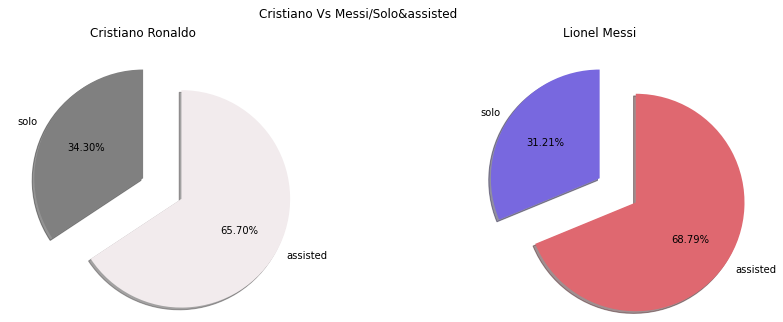

In [ ]:
df_ronaldo=df.loc[df['player']=='ronaldo']
df_messi=df.loc[df['player']=='messi']
#===== 
ronaldo_solo=df_ronaldo[df_ronaldo['solo']=='solo'] 
ronaldo_assisted=df_ronaldo[df_ronaldo['solo']=='assisted'] 
slices=[len(ronaldo_solo),len(ronaldo_assisted)]
labels=['solo','assisted']
#==== 
messi_solo=df_messi[df_messi['solo']=='solo'] 
messi_assisted=df_messi[df_messi['solo']=='assisted'] 
slices1=[len(messi_solo),len(messi_assisted)]
labels1=['solo','assisted']
#===
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Cristiano Vs Messi/Solo&assisted')
axes[0].pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#808080','#F2EBED']);
axes[0].set_title('Cristiano Ronaldo')
axes[1].pie(slices1,labels=labels1,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#7868DF','#DF6870']);
axes[1].set_title('Lionel Messi');

**Goals in One Match**

In [ ]:
r_goal=pd.DataFrame(df_ronaldo['date'].value_counts().sort_values(ascending=False))
r_goal['nick']=r_goal['date'].apply(lambda x:'hatrick' if x==3 else ('haul' if x==4 else ('glut' if x==5 else ('brace' if x ==2 else 'single goal'))))
r_goal.head()

,date,nick
2015-04-05,5,glut
2015-09-12,5,glut
2015-12-08,4,haul
2010-10-23,4,haul
2011-05-07,4,haul


In [ ]:
m_goal=pd.DataFrame(df_messi['date'].value_counts().sort_values(ascending=False))
m_goal['nick']=m_goal['date'].apply(lambda x:'hatrick' if x==3 else ('haul' if x==4 else ('glut' if x==5 else ('brace' if x ==2 else 'single goal'))))
r_goal['player']='ronaldo'
m_goal['player']='messi'
#=== 
all_goal = r_goal.append(m_goal).reset_index()
all_goal.rename(columns={'date':'goal_count'},inplace=True)

In [ ]:
import plotly.express as px
fig = px.box(all_goal, x="player", y='goal_count')
fig.show()

Text(0.5, 1.0, 'Christiano Vs Messi- Goals in one Match')

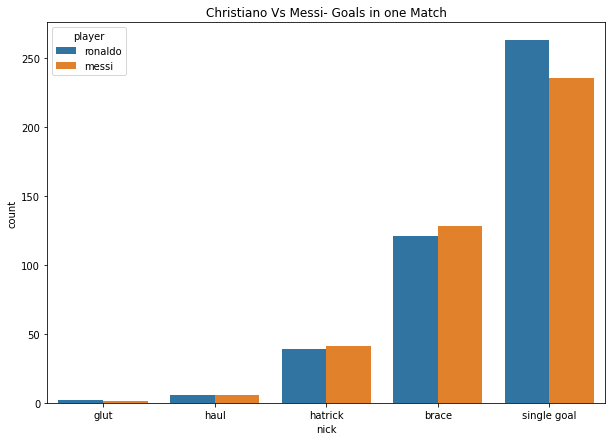

In [ ]:
#cr7 vs messi goals in one match 
plt.figure(figsize=(10,7))
sns.countplot(data=all_goal, x='nick', hue='player').set_title("Christiano Vs Messi- Goals in one Match")

Text(0.5, 1.0, 'Christiano Vs Messi- Home & Away')

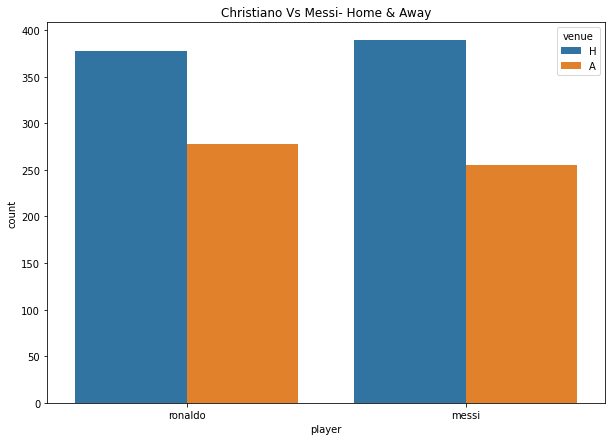

In [ ]:
#home and away goals 
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='player', hue='venue').set_title('Christiano Vs Messi- Home & Away')

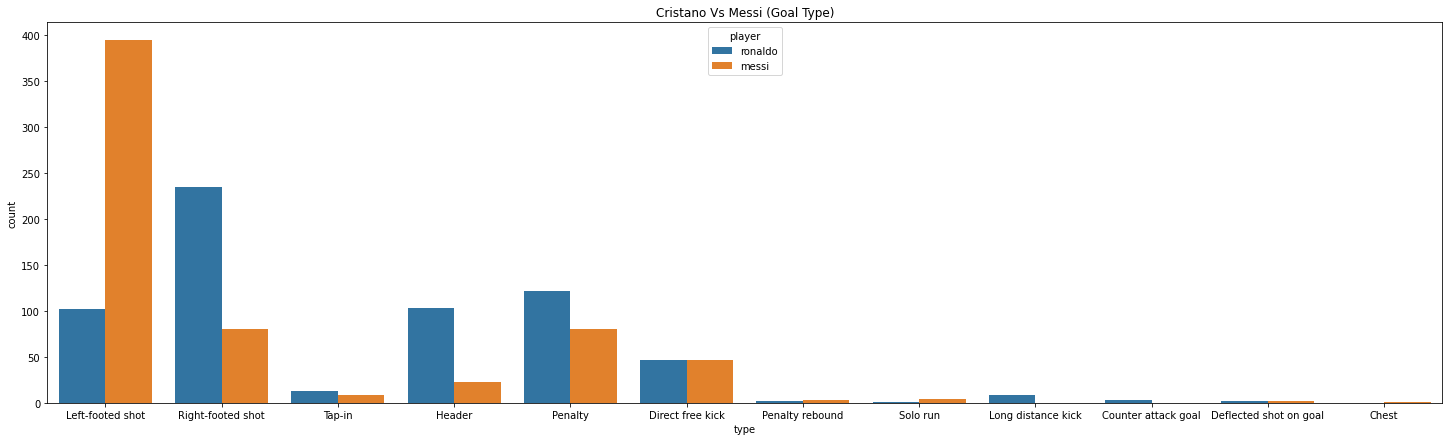

In [ ]:
#type of goal
plt.figure(figsize=(25,7))
sns.countplot(data=df,x='type',hue='player').set_title('Cristano Vs Messi (Goal Type)');

Text(0.5, 1.0, 'Christiano vs Messi Goal Position')

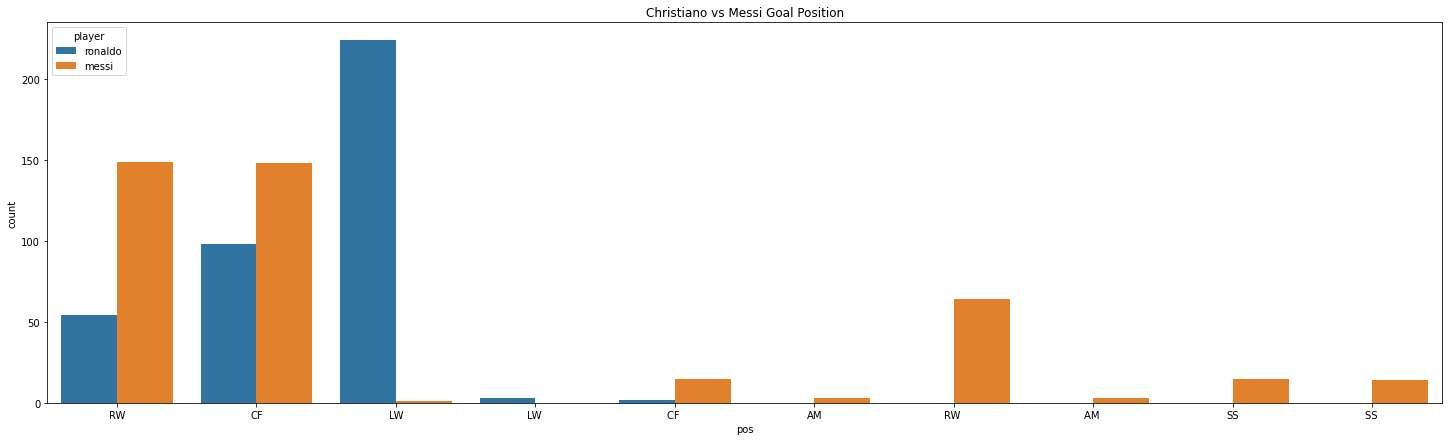

In [ ]:
#Goal Position 
plt.figure(figsize=(25,7))
sns.countplot(data=df, x='pos', hue='player').set_title('Christiano vs Messi Goal Position')

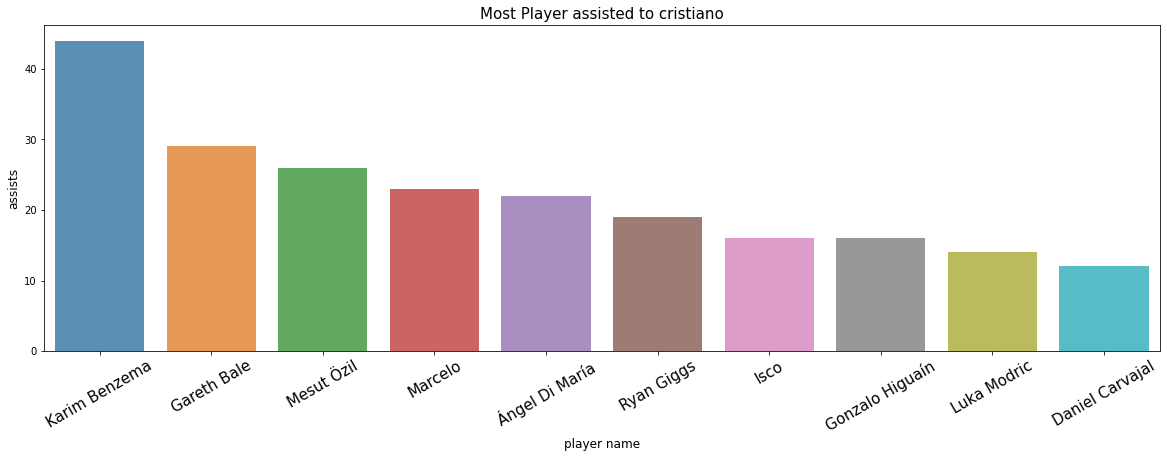

In [ ]:
#roro and messi best friends 
r_assist = df_ronaldo['assisted'].value_counts()
r_assist = r_assist[:10]
plt.figure(figsize=(20,6));
r_assist_vis = sns.barplot(r_assist.index, r_assist.values, alpha=0.8)
plt.title('Most Player assisted to cristiano',fontsize=15);
plt.ylabel('assists', fontsize=12);
plt.xlabel('player name', fontsize=12);
r_assist_vis.set_xticklabels(rotation=30,labels=r_assist.index,fontsize=15);
plt.show();

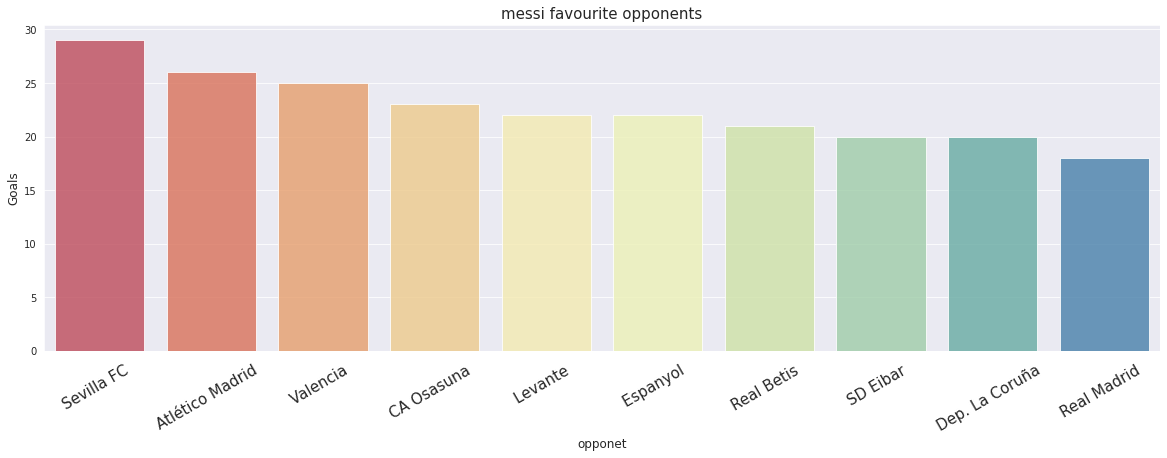

In [ ]:
m_op =df_messi['opp'].value_counts()
m_op = m_op[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6));
m_op_vis = sns.barplot(m_op.index, m_op.values, alpha=0.8,palette="Spectral");
plt.title('messi favourite opponents',fontsize=15);
plt.ylabel('Goals', fontsize=12);
plt.xlabel('opponet', fontsize=12);
m_op_vis.set_xticklabels(rotation=30,labels=m_op.index,fontsize=15);
plt.show();

In [ ]:
min_ronaldo1=df_ronaldo.groupby(['min']).size().to_frame('count').reset_index()
min_ronaldo=min_ronaldo1.sort_values(by='count', ascending=False)[:10]
min_ronaldo=min_ronaldo.reset_index()
min_ronaldo=min_ronaldo.rename(columns={'min':('Ronald_min')})
min_ronaldo=min_ronaldo.drop(columns=['index'])
#=====
#=====
min_messi=df_messi.groupby(['min']).size().to_frame('count').reset_index()
min_messi=min_messi.sort_values(by='count', ascending=False)[:10]
min_messi=min_messi.reset_index()
min_messi=min_messi.rename(columns={'min':('messi_min')})
min_messi=min_messi.drop(columns='index')
#==== 
min_ronaldo


,Ronald_min,count
0,90,18
1,23,14
2,45,14
3,89,13
4,76,13
5,70,13
6,82,12
7,26,11
8,68,10
9,59,10


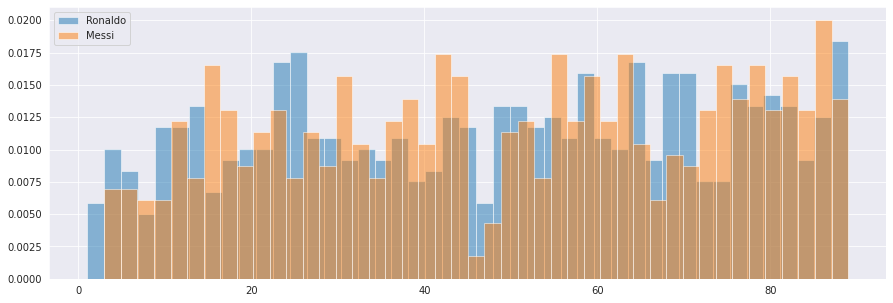

In [ ]:
min_cr7=df_ronaldo[df_ronaldo['min']<90]
min_values=min_cr7['min'].values
#========
min_messi=df_messi[df_messi['min']<90]
min_values_messi=min_messi['min'].values
min_values_messi
#=== 
#figure,axes = plt.subplots(1,2,figsize=(10,5))
plt.figure(figsize=(15,5))
plt.hist(min_values,histtype='bar',bins=45,density=True,label='Ronaldo',alpha=0.5);
plt.hist(min_values_messi,bins=45,histtype='bar',density=True,label='Messi',alpha=0.5);
plt.legend(loc='upper left')

Text(0.5, 0, 'Home Factor')

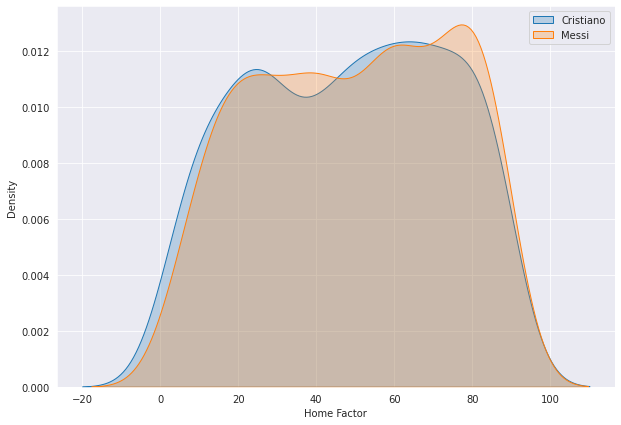

In [ ]:
plt.figure(figsize=(10,7))
sns.kdeplot(min_values, shade = True)
sns.kdeplot(min_values_messi, shade = True)
plt.legend(['Cristiano','Messi'])
plt.xlabel('Home Factor')

In [ ]:
#Goals Race for each season
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/4882308" data-url="https://flo.uri.sh/visualisation/4882308/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')